In [ ]:
# Installs
!pip install transformers
!pip install tqdm
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 11.4 MB/s eta 0:00:00


In [ ]:
# Imports
import pandas as pd
from tqdm import tqdm
from transformers import pipeline

In [ ]:
# Connect to GDrive
from google.colab import drive
drive.mount('/content/drive//')


Mounted at /content/drive//


In [ ]:
# Read in CSVs
combined_df = pd.read_csv('/content/drive/My Drive/Data/combined_df.csv')

print(len(combined_df))


28609


In [ ]:
# Mix
combined_df = combined_df.sample(frac=1, random_state=42)

In [ ]:
combined_df

,favourites,retweets,followers,source,label,preprocessed,length_preprocessed
10853,50.0,20.0,691748.0,official,-1,The drive-through coronavirus testing site in ...,157
4034,58.0,25.0,12269236.0,official,-1,"""4⃣ and WHO are exploring how the EIB could s...",224
3858,555.0,236.0,12269233.0,official,-1,Media briefing on COVID19 with,32
11946,0.0,3251.0,512848.0,official,-1,"RT : The new NHSCOVID19app, now available in E...",125
17497,NaN,NaN,NaN,competition,1,Dr. Yan presented evidence Covid 19...,190
...,...,...,...,...,...,...,...
21575,1.0,0.0,2509.0,truth_seeker,1,Omicron is genetically distant enough from i...,290
5390,123.0,15.0,691756.0,official,-1,UPDATE on COVIDー19 testing in the UK:\n\nToday...,203
860,39.0,33.0,691757.0,official,-1,The pandemic is affecting us all. \n\nIf you a...,244
15795,129.0,51.0,12269355.0,official,-1,The interim guideline on the use of dexamethas...,168


Model 1: bert-base-multilingual-uncased-sentiment

In [ ]:
# Define Model and Task
model = "nlptown/bert-base-multilingual-uncased-sentiment"
task = "sentiment-analysis"

sentiment_pipeline = pipeline(task, model=model)


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
def process_tweet(tweet):
    if len(tweet) > 512:
        tweet = tweet[:512]

    result = sentiment_pipeline(tweet)[0]
    label = result['label']  # Extracts label like '1 star', '2 stars', etc.
    num_label = int(label[0])  # Extracts the numerical part
    return num_label


Model 2: Cardiff (from the talk)

In [ ]:
model_v3 = "cardiffnlp/twitter-roberta-base-sentiment-latest"
task = "sentiment-analysis"

sentiment_pipeline_v3 = pipeline(task, model=model_v3)



Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def process_tweet_v3(tweet):
    if len(tweet) > 512:
        tweet = tweet[:512]

    result = sentiment_pipeline_v3(tweet)[0]
    label_map = {"negative": 0, "neutral": 1, "positive": 2}  # Add or change according to your labels
    num_label = label_map.get(result['label'], -1)  # -1 would mean label is not found in our mapping
    return num_label


## Running the model

In [ ]:
tqdm.pandas()
combined_df['sentiment_BERT'] = combined_df['preprocessed'].progress_apply(process_tweet)


100%|██████████| 28609/28609 [1:22:09<00:00,  5.80it/s]


In [ ]:
combined_df.to_csv('/content/drive/My Drive/combined_df_sentiment_2023_06_20.csv', index=False)

In [ ]:
combined_df['sentiment_RoBERTa'] = combined_df['preprocessed'].progress_apply(process_tweet_v3)

100%|██████████| 28609/28609 [1:26:26<00:00,  5.52it/s]


In [ ]:
combined_df.to_csv('/content/drive/My Drive/combined_df_sentiment_2023_06_20.csv', index=False)

In [ ]:
combined_df

,favourites,retweets,followers,source,label,preprocessed,length_preprocessed,sentiment_BERT,sentiment_RoBERTa
10853,50.0,20.0,691748.0,official,-1,The drive-through coronavirus testing site in ...,157,4,1
4034,58.0,25.0,12269236.0,official,-1,"""4⃣ and WHO are exploring how the EIB could s...",224,5,1
3858,555.0,236.0,12269233.0,official,-1,Media briefing on COVID19 with,32,4,1
11946,0.0,3251.0,512848.0,official,-1,"RT : The new NHSCOVID19app, now available in E...",125,5,1
17497,NaN,NaN,NaN,competition,1,Dr. Yan presented evidence Covid 19...,190,1,1
...,...,...,...,...,...,...,...,...,...
21575,1.0,0.0,2509.0,truth_seeker,1,Omicron is genetically distant enough from i...,290,4,1
5390,123.0,15.0,691756.0,official,-1,UPDATE on COVIDー19 testing in the UK:\n\nToday...,203,2,1
860,39.0,33.0,691757.0,official,-1,The pandemic is affecting us all. \n\nIf you a...,244,5,1
15795,129.0,51.0,12269355.0,official,-1,The interim guideline on the use of dexamethas...,168,4,1


       sentiment_BERT  sentiment_RoBERTa
count    28609.000000       28609.000000
mean         2.811388           0.767416
std          1.713835           0.627773
min          1.000000           0.000000
25%          1.000000           0.000000
50%          3.000000           1.000000
75%          5.000000           1.000000
max          5.000000           2.000000
      sentiment_BERT                                               \
               count      mean       std  min  25%  50%  75%  max   
label                                                               
-1           15866.0  3.614206  1.554546  1.0  2.0  4.0  5.0  5.0   
 1           12743.0  1.811818  1.335636  1.0  1.0  1.0  2.0  5.0   

      sentiment_RoBERTa                                               
                  count      mean       std  min  25%  50%  75%  max  
label                                                                 
-1              15866.0  1.052565  0.525442  0.0  1.0  1.0  1.0  2.0  
 

<Figure size 1200x800 with 0 Axes>

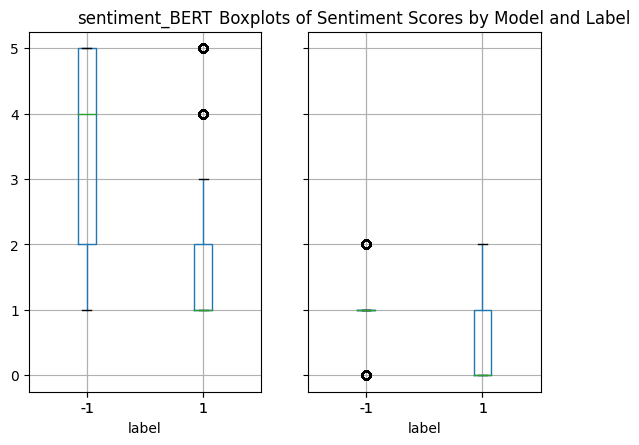

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate descriptive statistics for each sentiment column
print(combined_df[['sentiment_BERT', 'sentiment_RoBERTa']].describe())

# Group by the label and calculate descriptive statistics for each group
print(combined_df.groupby('label')[['sentiment_BERT', 'sentiment_RoBERTa']].describe())

# Boxplot to compare distributions across classes
plt.figure(figsize=(12, 8))
combined_df.boxplot(column=['sentiment_BERT', 'sentiment_RoBERTa'], by='label')
plt.title('Boxplots of Sentiment Scores by Model and Label')
plt.suptitle('')  # Suppress the automatic 'group of boxplots' title
plt.show()


## Valence, Arousal, Dominance, Concreteness

In [ ]:
feature_df = pd.read_csv('/content/drive/My Drive/Data/combined_df_sentiment_2023_06_20.csv')

In [ ]:
model_concreteness = "samueldomdey/concreteness-english-roberta-base"
model_valence = "samueldomdey/valence-english-distilroberta-base"
model_dominance = "samueldomdey/dominance-english-distilroberta-base"
model_arousal = "samueldomdey/arousal-english-distilroberta-base"


In [ ]:
sentiment_pipeline_concreteness = pipeline(model=model_concreteness)
sentiment_pipeline_valence = pipeline(model=model_valence)
sentiment_pipeline_dominance = pipeline(model=model_dominance)
sentiment_pipeline_arousal = pipeline(model=model_arousal)


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
print(sentiment_pipeline_concreteness("I will cut this tree.")[0]["label"])
print(sentiment_pipeline_concreteness("This concept is sophisticated")[0]["label"])


LABEL_1
LABEL_0


In [ ]:
print(sentiment_pipeline_valence("This tree is horrible. Absolutely awful."))
print(sentiment_pipeline_valence("This women is lovely"))

[{'label': 'Valence', 'score': 0.5388229489326477}]
[{'label': 'Valence', 'score': 0.6976909041404724}]


In [ ]:
print(sentiment_pipeline_dominance("This tree is horrible. Absolutely awful."))
print(sentiment_pipeline_dominance("This women is lovely"))

[{'label': 'Dominance', 'score': 0.5935491323471069}]
[{'label': 'Dominance', 'score': 0.6324966549873352}]


In [ ]:
def process_tweet(tweet):
  if len(tweet) > 512:
      tweet = tweet[:512]

  concreteness = sentiment_pipeline_concreteness(tweet)[0]["label"]
  label_map = {"LABEL_0": 0, "LABEL_1": 1}  # Add or change according to your labels
  concreteness = label_map.get(concreteness, -1)  # -1 would mean label is not found in our mapping

  valence = sentiment_pipeline_valence(tweet)[0]["score"]
  dominance = sentiment_pipeline_dominance(tweet)[0]["score"]
  arousal = sentiment_pipeline_arousal(tweet)[0]["score"]

  return concreteness, valence, dominance, arousal


In [ ]:
for i, row in tqdm(feature_df.iterrows(), total=feature_df.shape[0]):
    tweet = row['preprocessed']
    concreteness_score, valence_score, dominance_score, arousal_score = process_tweet(tweet)
    feature_df.loc[i, 'concreteness'] = concreteness_score
    feature_df.loc[i, 'valence'] = valence_score
    feature_df.loc[i, 'dominance'] = dominance_score
    feature_df.loc[i, 'arousal'] = arousal_score


100%|██████████| 28609/28609 [3:09:19<00:00,  2.52it/s]


In [ ]:
feature_df.to_csv('/content/drive/My Drive/combined_df_sentiment_detailed_2023_06_30.csv', index=False)

## Concretness only (changed model)

In [ ]:
feature_df = pd.read_csv('/content/drive/My Drive/Data/combined_df_sentiment_detailed_2023_06_30.csv')

In [ ]:
feature_df

,favourites,retweets,followers,source,label,preprocessed,length_preprocessed,sentiment_BERT,sentiment_RoBERTa,concreteness,valence,dominance,arousal
0,50.0,20.0,691748.0,official,-1,The drive-through coronavirus testing site in ...,157,4,1,1.0,0.606417,0.630947,0.626204
1,58.0,25.0,12269236.0,official,-1,"""4⃣ and WHO are exploring how the EIB could s...",224,5,1,1.0,0.646490,0.634640,0.612494
2,555.0,236.0,12269233.0,official,-1,Media briefing on COVID19 with,32,4,1,1.0,0.633763,0.618594,0.622606
3,0.0,3251.0,512848.0,official,-1,"RT : The new NHSCOVID19app, now available in E...",125,5,1,1.0,0.610125,0.617799,0.632323
4,NaN,NaN,NaN,competition,1,Dr. Yan presented evidence Covid 19...,190,1,1,1.0,0.609986,0.621102,0.628665
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28604,1.0,0.0,2509.0,truth_seeker,1,Omicron is genetically distant enough from i...,290,4,1,1.0,0.603416,0.622211,0.626217
28605,123.0,15.0,691756.0,official,-1,UPDATE on COVIDー19 testing in the UK:\n\nToday...,203,2,1,1.0,0.642929,0.633660,0.632345
28606,39.0,33.0,691757.0,official,-1,The pandemic is affecting us all. \n\nIf you a...,244,5,1,0.0,0.564541,0.621570,0.634196
28607,129.0,51.0,12269355.0,official,-1,The interim guideline on the use of dexamethas...,168,4,1,1.0,0.617875,0.618315,0.613622


In [ ]:
print(sentiment_pipeline_concreteness("I will cut this tree."))
print(sentiment_pipeline_concreteness("This concept is sophisticated"))

[{'label': 'Concreteness', 'score': 0.700579822063446}]
[{'label': 'Concreteness', 'score': 0.5924111604690552}]


In [ ]:
def process_tweet_concreteness(tweet):
  if len(tweet) > 512:
      tweet = tweet[:512]

  concreteness = sentiment_pipeline_concreteness(tweet)[0]["score"]

  return concreteness


In [ ]:
for i, row in tqdm(feature_df.iterrows(), total=feature_df.shape[0]):
    tweet = row['preprocessed']
    concreteness_score = process_tweet_concreteness(tweet)
    feature_df.loc[i, 'concreteness'] = concreteness_score


100%|█████████▉| 28476/28609 [1:33:20<00:23,  5.56it/s]

In [ ]:
feature_df

,favourites,retweets,followers,source,label,preprocessed,length_preprocessed,sentiment_BERT,sentiment_RoBERTa,concreteness,valence,dominance,arousal
0,50.0,20.0,691748.0,official,-1,The drive-through coronavirus testing site in ...,157,4,1,0.652198,0.606417,0.630947,0.626204
1,58.0,25.0,12269236.0,official,-1,"""4⃣ and WHO are exploring how the EIB could s...",224,5,1,0.642415,0.646490,0.634640,0.612494
2,555.0,236.0,12269233.0,official,-1,Media briefing on COVID19 with,32,4,1,0.647267,0.633763,0.618594,0.622606
3,0.0,3251.0,512848.0,official,-1,"RT : The new NHSCOVID19app, now available in E...",125,5,1,0.646969,0.610125,0.617799,0.632323
4,NaN,NaN,NaN,competition,1,Dr. Yan presented evidence Covid 19...,190,1,1,0.644149,0.609986,0.621102,0.628665
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28604,1.0,0.0,2509.0,truth_seeker,1,Omicron is genetically distant enough from i...,290,4,1,0.635142,0.603416,0.622211,0.626217
28605,123.0,15.0,691756.0,official,-1,UPDATE on COVIDー19 testing in the UK:\n\nToday...,203,2,1,0.642401,0.642929,0.633660,0.632345
28606,39.0,33.0,691757.0,official,-1,The pandemic is affecting us all. \n\nIf you a...,244,5,1,0.631691,0.564541,0.621570,0.634196
28607,129.0,51.0,12269355.0,official,-1,The interim guideline on the use of dexamethas...,168,4,1,0.661529,0.617875,0.618315,0.613622


In [ ]:
feature_df.to_csv('/content/drive/My Drive/combined_df_sentiment_detailed_2023_06_30.csv', index=False)